# Trabajo Práctico 2 - Laboratorio de Datos - 1C 2025

**Integrantes del grupo:** Julian Hardie, Walter Yance, Rodrigo Coppa

In [273]:
# Si requieren mas librerias, pueden importarlas aca
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import seaborn.objects as so
import json
import plotly.express as px
import matplotlib.pyplot as plt
from formulaic import Formula
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Si no existe root_mean_squared_error, quitarlo o actualizar scikit-learn con el comando
#!pip install scikit-learn --upgrade

### Clustering

**1.** Cargar en un DataFrame **df_news** los datos del archivo **noticias.csv**.

In [123]:
import os
os.getcwd()

'C:\\Users\\Usuario\\Downloads'

In [125]:
df_news = pd.read_csv('noticias.csv')
df_news

,title,content,category
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...,business
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...,business
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...,business
...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help beat...,tech
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to ig...,tech
2222,Be careful how you code,A new European directive could put software wr...,tech
2223,US cyber security chief resigns,The man making sure US computer networks are s...,tech


**2.** Crear un DataFrame **df_sports** que contenga solo las noticias de la categoría deportes, y resetear los índices.

In [129]:
df_sports = df_news[df_news["category"] == "sport"].reset_index(drop=True)
df_sports = df_sports.dropna(subset=["content"])
df_sports

,title,content,category
0,Claxton hunting first major medal,British hurdler Sarah Claxton is confident she...,sport
1,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would ...,sport
2,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of lo...,sport
3,IAAF launches fight against drugs,The IAAF - athletics' world governing body - h...,sport
4,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world rec...,sport
...,...,...,...
506,Big guns ease through in San Jose,Top-seeded Americans Andy Roddick and Andre Ag...,sport
507,Almagro continues Spanish surge,Unseeded Nicolas Almagro became the fifth Span...,sport
508,Melzer shocks Agassi in San Jose,Second seed Andre Agassi suffered a comprehens...,sport
509,Mirza makes Indian tennis history,Teenager Sania Mirza completed a superb week a...,sport


**3**. Generar un DataFrame **df_sports_stems** que contenga una columna por cada stem que aparece en los contenidos de las noticias de deportes, excluyendo las stop words. Para cada noticia, cada columna indica la cantidad de veces que aparece esa palabra en la noticia. Pueden utilizar el siguiente código.

In [131]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download("punkt_tab")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

stemmer = SnowballStemmer(language = "english")

# Generamos una lista con todos los stems de palabras del texto 
# (excluyendo stop words y palabras que tienen numeros o simbolos)

def tokenize_and_stem(text): 
    tokens = word_tokenize(text.lower()) 
    stems = [stemmer.stem(token) for token in tokens if (token.isalpha() and token not in stop_words)] 
    return stems

vectorizer = CountVectorizer(analyzer=tokenize_and_stem) 
X = vectorizer.fit_transform(df_sports["content"]) 
df_sports_stems = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_sports_stems

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,aaa,aac,aaron,abandon,abat,abbott,abc,abdomen,abdomin,abeb,...,zimbabw,zinc,zinedin,zoe,zola,zone,zornotza,zuluaga,zurich,zvonareva
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**4**. **Visualización.** Para poder visualizar las noticias y ver si se forman grupos de noticias, calcular las dos primeras componentes principales *Z<sub>1* y *Z<sub>2* del DataFrame **df_sports_stems** y realizar un gráfico de dispersión de *Z<sub>1* vs. *Z<sub>2*. 

In [133]:
# PCA a dos dimensiones
pca = PCA(n_components=2)
Z = pca.fit_transform(df_sports_stems)
Z

array([[-1.05929796,  0.87345705],
       [-2.42822186,  0.93575566],
       [ 0.05803156,  0.97410519],
       ...,
       [-0.58894977,  2.6018199 ],
       [ 2.42360631,  2.32391299],
       [ 0.23290553,  3.52348381]])

In [134]:
df_pca = pd.DataFrame(Z, columns=["Z1", "Z2"])
df_pca

,Z1,Z2
0,-1.059298,0.873457
1,-2.428222,0.935756
2,0.058032,0.974105
3,-2.868461,2.490485
4,-1.538699,1.910766
...,...,...
506,0.920141,3.305615
507,-0.849600,3.180860
508,-0.588950,2.601820
509,2.423606,2.323913


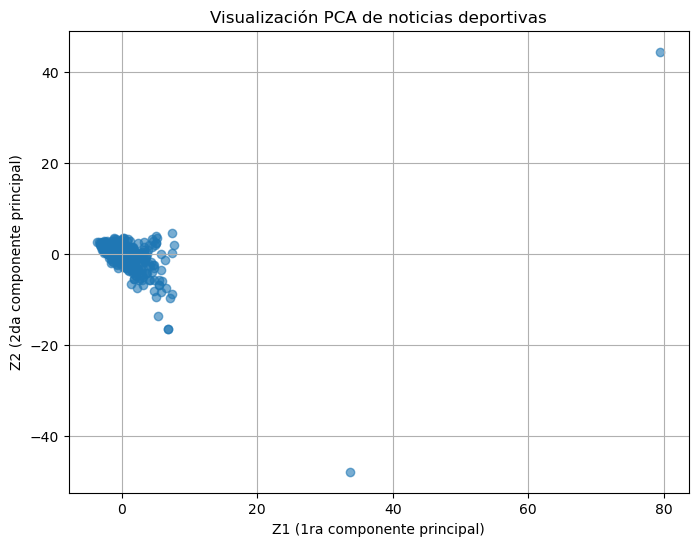

In [135]:
# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["Z1"], df_pca["Z2"], alpha=0.6)
plt.title("Visualización PCA de noticias deportivas")
plt.xlabel("Z1 (1ra componente principal)")
plt.ylabel("Z2 (2da componente principal)")
plt.grid(True)
plt.show()

**5**. ¿Pueden observar grupos en esta visualización? ¿Cuál puede ser el problema?

En la visualización de las dos primeras componentes principales (PCA) aplicadas sobre el modelo bag-of-words, no se observan agrupamientos claros de noticias. La gran mayoría de los puntos está fuertemente concentrada en una región cercana al origen, mientras que algunos pocos puntos aparecen muy alejados del resto, lo cual distorsiona la escala del gráfico. Esto puede deberse a que la mayoria de los textos en las noticias utilizan un léxico similar y solo algunas, muy pocas, utilizan un vocabulario poco frecuente.

Por lo tanto, la visualización no permite encontrar grupos bien definidos y esto limita su utilidad para descubrir grupos temáticos. Como por ejemplo el de futbol-tenis

**6**. Generar un DataFrame **df_sports_tfidf** que contenga una columna por cada stem que aparece en los contenidos de las noticias de deportes. Para cada noticia, cada columna indica el valor de TF-IDF. Pueden utilizar el siguiente código.

In [139]:
# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(analyzer=tokenize_and_stem, smooth_idf = False)
X = vectorizer.fit_transform(df_sports["content"]) 
df_sports_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_sports_tfidf

,aaa,aac,aaron,abandon,abat,abbott,abc,abdomen,abdomin,abeb,...,zimbabw,zinc,zinedin,zoe,zola,zone,zornotza,zuluaga,zurich,zvonareva
0,0.090095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
vectorizer

TfidfVectorizer(analyzer=<function tokenize_and_stem at 0x0000023B80446D40>,
                smooth_idf=False)

**O1**. (Opcional.) Para la raíz `abandon`, calcular mediante funciones usuales el valor de TF-IDF para la noticia deportiva 246 (con título Real will finish abandoned match). Comparar el valor en la tabla generada con el valor que obtuvieron a mano en el ítem anterior.

In [142]:
# Verificamos el título de la noticia 246
titulo_noticia_246 = df_sports.loc[246, "title"]
contenido_noticia_246 = df_sports.loc[246, "content"]
titulo_noticia_246, contenido_noticia_246[:500] # Mostrar solo los primeros 500 caracteres

('Real will finish abandoned match',
 'Real Madrid and Real Socieded will play the final six minutes of their match, which was abandoned on Sunday because of a bomb scare.\n \n The Bernabeu was evacuated with the score at 1-1 and two minutes of normal time remaining in the game. The teams will now play the final two minutes, plus four minutes of injury time, on 5 January. Brazilian Ronaldo and England captain David Beckham had to wait in the street in their kit after the abandonment. Real Sociedad president Jose Luis Astiazaran said: "')

In [143]:
# Ahora calculamos el valor de TF-IDF para la noticia
tokens_246 = tokenize_and_stem(contenido_noticia_246)
stem_abandon = stemmer.stem("abandon")

# Cálculo de TF
tf_abandon = tokens_246.count(stem_abandon) / np.sqrt(sum(tokens_246.count(t)**2 for t in set(tokens_246)))
          
# Cálculo de IDF
n_docs = len(df_sports)
docs_con_abandon = df_sports["content"].apply(
    lambda text: stem_abandon in tokenize_and_stem(str(text))
)
df_abandon = docs_con_abandon.sum()
idf_abandon = math.log(n_docs / df_abandon) + 1

# Cálculo de TF-IDF final
tfidf_abandon_246 = tf_abandon * idf_abandon

In [144]:
print(f"TF: {tf_abandon}")
print(f"IDF: {idf_abandon}")
print(f"TF-IDF: {tfidf_abandon_246}")

TF: 0.115278083540847
IDF: 6.543222409643759
TF-IDF: 0.7542901395652555


In [145]:
# Ahora lo comparamos con el valor de la tabla
df_sports_tfidf.loc[246, "abandon"]

0.20461420525833457

In [189]:
# No da igual, nose porque

**7**. **Visualización.** Calcular las dos primeras componentes principales *Z<sub>1* y *Z<sub>2* del DataFrame **df_sports_tfidf** y realizar un gráfico de dispersión de *Z<sub>1* vs *Z<sub>2*. ¿Pueden observar agrupamientos en esta visualización?

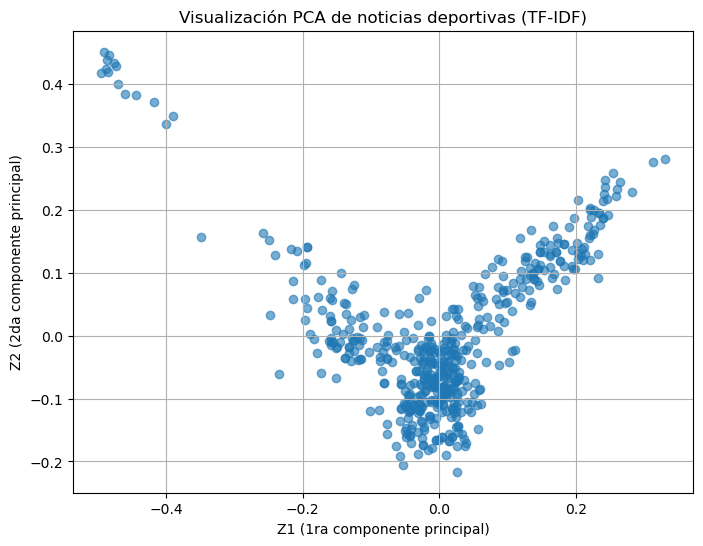

In [187]:
# Se aplica PCA a los vectores TF-IDF
pca = PCA(n_components=2)
Z_tfidf = pca.fit_transform(df_sports_tfidf)

# Se crea el DataFrame con las componentes principales
df_pca_tfidf = pd.DataFrame(Z_tfidf, columns=["Z1", "Z2"])

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_tfidf["Z1"], df_pca_tfidf["Z2"], alpha=0.6)
plt.title("Visualización PCA de noticias deportivas (TF-IDF)")
plt.xlabel("Z1 (1ra componente principal)")
plt.ylabel("Z2 (2da componente principal)")
plt.grid(True)
plt.show()

En la visualización obtenida con las dos primeras componentes principales del modelo TF-IDF, se observan agrupamientos más definidos en comparación con la visualización previa con bag-of-words.

Los puntos se encuentran mejor distribuidos, sin valores extremos que distorsionen la escala, y se aprecian zonas densas donde varias noticias parecen compartir características comunes, así como ramas o subestructuras que podrían corresponder a distintas disciplinas deportivas.

Esto confirma que el uso de TF-IDF mejora la representación de las noticias al ponderar mejor las palabras distintivas de cada documento, lo cual facilita la identificación de grupos potenciales

**8**. **Clustering.** Realizar un agrupamiento de los datos por algún método de clustering entre los vistos en clase (K-means o DB-scan). Utilizar todas las columnas de datos (no las componentes principales), seleccionado los hiperparámetros por algún mecanismo que consideren apropiado.

In [151]:
# Aplicamos el método de K-means
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_sports_tfidf)

In [152]:
# PCA para visualización
pca = PCA(n_components=2)
Z = pca.fit_transform(df_sports_tfidf)
df_pca = pd.DataFrame(Z, columns=["Z1", "Z2"])
df_pca["cluster"] = clusters

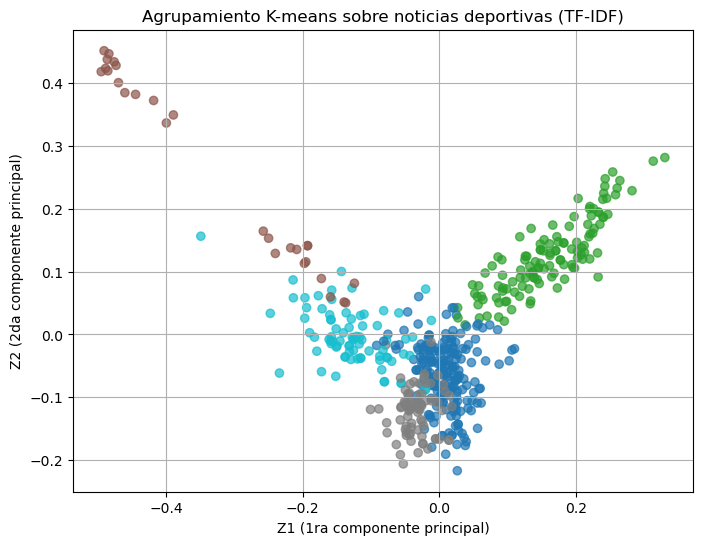

In [153]:
# Grafico
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["Z1"], df_pca["Z2"], c=df_pca["cluster"], cmap="tab10", alpha=0.7)
plt.title("Agrupamiento K-means sobre noticias deportivas (TF-IDF)")
plt.xlabel("Z1 (1ra componente principal)")
plt.ylabel("Z2 (2da componente principal)")
plt.grid(True)
plt.show()

**9**. Colorear los puntos del gráfico de dispersión de PCA según las etiquetas de los clusters. ¿Quedan los puntos de cada cluster ubicados cerca en esta visualización?

En la visualización resultante del clustering con K-means aplicado sobre los vectores TF-IDF, se observan agrupamientos bien definidos en su mayoría.

Dos de los clusters (por ejemplo, el que aparece en la parte superior izquierda y el que se extiende hacia la derecha) están claramente separados del resto, lo que indica que agrupan noticias con contenido muy diferenciado. Esto sugiere que el modelo pudo capturar temas distintivos dentro de las noticias deportivas.

Sin embargo, en la zona central del gráfico se observa una mayor superposición entre algunos grupos. Esto podría deberse a que ciertas noticias comparten términos comunes o abordan eventos multitemáticos, lo que dificulta su separación neta en el espacio semántico.

**10**. **Identificación de temáticas.** Queremos identificar las temáticas de algunos de estos clusters. Para esto pueden utilizar cualquier estrategia que consideren apropiada. Por ejemplo, ver los títulos o contenidos de las noticias en algunos clusters. Si algunas de las componentes principales distingue clusters, ver qué palabras tienen peso en esa componente. Por ejemplo, si vemos que un cluster corresponde a noticias con coordenada Z1 alta, analizamos en las coordenadas de la dirección principal correspondiente qué palabras tienen el mayor peso positivo. Algunos clusters pueden no tener una temática clara. Identificar temáticas en al menos 2 clusters del agrupamiento.

In [157]:
# Asocia el cluster al DataFrame original
df_sports["cluster"] = clusters

# Ve los títulos más representativos de cada cluster
for i in sorted(df_sports["cluster"].unique()):
    print(f"\n--- Cluster {i} ---")
    print(df_sports[df_sports["cluster"] == i]["title"].head(5).to_string(index=False))


--- Cluster 0 ---
 Costin aims for comeback in 2006
        Man Utd stroll to Cup win
     Van Nistelrooy set to return
Moyes U-turn on Beattie dismissal
 Ronaldo considering new contract

--- Cluster 1 ---
Republic to face China and Italy
 Hodgson shoulders England blame
      Vickery out of Six Nations
Yachvili savours France comeback
       Laporte tinkers with team

--- Cluster 2 ---
IAAF launches fight against drugs
Verdict delay for Greek sprinters
  Call for Kenteris to be cleared
  Greek pair attend drugs hearing
Collins appeals against drugs ban

--- Cluster 3 ---
 Henman overcomes rival Rusedski
Safin slumps to shock Dubai loss
 Ferrero eyes return to top form
     Roddick into San Jose final
      Federer claims Dubai crown

--- Cluster 4 ---
Claxton hunting first major medal
   O'Sullivan could run in Worlds
Greene sets sights on world title
Dibaba breaks 5,000m world record
 Isinbayeva claims new world best


Parece haber una distinción clara en los títulos de cada cluster. En el primer cluster, aparece el equipo Manchester United como principal eje temático. En el segundo cluster se habla sobre resultados a partir de partidos entre selecciones de Fútbol, como China e Italia. En el tercer cluster hay noticias relacionadas al tema de doping en los jugadores. En el cuarto cluster, hablan sobre noticias relacionadas al Tenis con jugadores como Federer o Roddick. Y por último, en el quinto cluster, son noticias del mundo del atletismo y resultados en las olimpíadas o copas del mundo.

### Clasificación

**11**. Generar un DataFrame **df_news_tfidf** que contenga una columna por cada stem que aparece en los contenidos de todas las noticias. Para cada noticia, cada columna indica el valor de TF-IDF (utilicen el mismo código de antes para generar este DataFrame).

In [161]:
vectorizer = TfidfVectorizer(analyzer=tokenize_and_stem, smooth_idf = False)
X = vectorizer.fit_transform(df_news["content"]) 

In [162]:
df_news_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_news_tfidf

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aara,aarhus,aaron,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**12**. **Visualización.** Calcular las dos primeras componentes principales *Z<sub>1* y *Z<sub>2* del DataFrame **df_news_tfidf** y realizar un gráfico de dispersión de *Z<sub>1* vs *Z<sub>2*, coloreando cada punto según la categoría del artículo.

In [164]:
# Calculo las dos primeras componentes principales
pca = PCA(n_components=2)
Z = pca.fit_transform(df_news_tfidf)

# Construyo un DataFrame con Z1, Z2 y la categoría
df_pca = pd.DataFrame(Z, columns=['Z1', 'Z2'])
df_pca['category'] = df_news['category']

df_pca

,Z1,Z2,category
0,-0.040273,0.125715,business
1,0.037851,0.133899,business
2,0.015012,0.077756,business
3,-0.013483,0.077421,business
4,-0.032259,0.028234,business
...,...,...,...
2220,-0.016973,0.174826,tech
2221,-0.021665,0.152490,tech
2222,0.037463,0.084699,tech
2223,0.014747,0.059175,tech


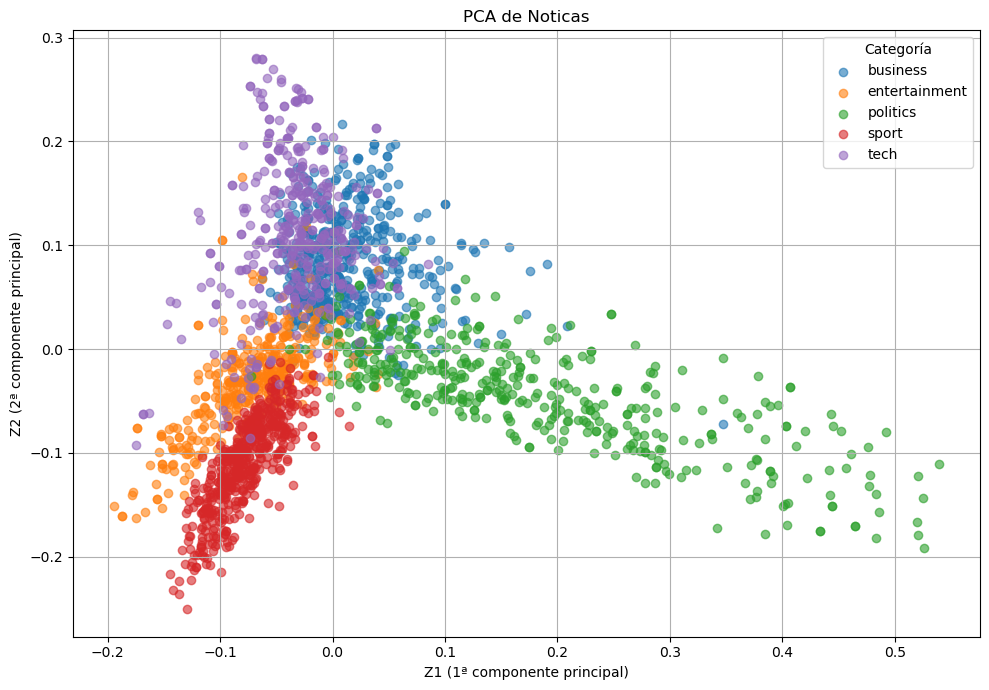

In [165]:
# Grafico de Z1 vs Z2 coloreando por categoría
plt.figure(figsize=(10, 7))
for cat in df_pca["category"].unique():
    mask = df_pca["category"] == cat
    plt.scatter(
        df_pca.loc[mask, "Z1"],
        df_pca.loc[mask, "Z2"],
        label=cat,
        alpha=0.6
    )

plt.xlabel("Z1 (1ª componente principal)")
plt.ylabel("Z2 (2ª componente principal)")
plt.title("PCA de Noticas")  # :contentReference[oaicite:0]{index=0}
plt.legend(title="Categoría")
plt.grid(True)
plt.tight_layout()
plt.show()

**O2**. (Opcional.) ¿Qué palabras tienen peso positivo alto y peso negativo alto en estas dos componentes?

In [167]:
# Extraemos los loadings: cada fila es un término, cada columna una componente
terms = vectorizer.get_feature_names_out()
loadings = pca.components_.T  # shape: (n_terms, n_components)
df_loadings = pd.DataFrame(loadings, index=terms, columns=['PC1','PC2'])

In [168]:
# Seleccionamos top 10 positivos y negativos para cada componente
top_pos_pc1 = df_loadings['PC1'].nlargest(10)
top_neg_pc1 = df_loadings['PC1'].nsmallest(10)
top_pos_pc2 = df_loadings['PC2'].nlargest(10)
top_neg_pc2 = df_loadings['PC2'].nsmallest(10)

In [169]:
# Mostramos los resultados
print("=== Componente Z1 (PC1): TOP 10 POSITIVOS ===")
print(top_pos_pc1.to_frame(name='PC1'))
print("\n=== Componente Z1 (PC1): TOP 10 NEGATIVOS ===")
print(top_neg_pc1.to_frame(name='PC1'))

print("\n=== Componente Z2 (PC2): TOP 10 POSITIVOS ===")
print(top_pos_pc2.to_frame(name='PC2'))
print("\n=== Componente Z2 (PC2): TOP 10 NEGATIVOS ===")
print(top_neg_pc2.to_frame(name='PC2'))

=== Componente Z1 (PC1): TOP 10 POSITIVOS ===
             PC1
mr      0.325245
labour  0.269852
elect   0.243302
parti   0.208712
blair   0.208676
tax     0.186981
brown   0.182504
tori    0.181686
govern  0.142177
minist  0.135204

=== Componente Z1 (PC1): TOP 10 NEGATIVOS ===
              PC1
game    -0.120487
film    -0.119000
award   -0.088967
best    -0.083645
play    -0.074214
player  -0.063316
star    -0.053398
music   -0.052088
england -0.045217
win     -0.044172

=== Componente Z2 (PC2): TOP 10 POSITIVOS ===
                PC2
mobil      0.170391
phone      0.150122
firm       0.114450
market     0.114028
technolog  0.111864
growth     0.104567
compani    0.102553
use        0.101832
servic     0.101220
user       0.097123

=== Componente Z2 (PC2): TOP 10 NEGATIVOS ===
              PC2
win     -0.138136
england -0.121955
play    -0.113919
best    -0.100566
labour  -0.099553
game    -0.091120
blair   -0.085901
elect   -0.083998
award   -0.079778
wale    -0.079286


**13**. Predecir la categoría de cada artículo utilizando KNN. Para esto:

**(a)** separar el conjunto total de datos en un 80 % para entrenamiento y un 20 % para testeo,

In [172]:
X = vectorizer.fit_transform(df_news["content"])
y = df_news['category']

# Separamos en 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**(b)** seleccionar el valor de K (entre números impares del 1 al 19 ambos inclusive) por algún
esquema de validación apropiado en el conjunto de entrenamiento (train-validation, crossvalidation, leave-one-out),

In [174]:
k_values = list(range(1, 20, 2))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

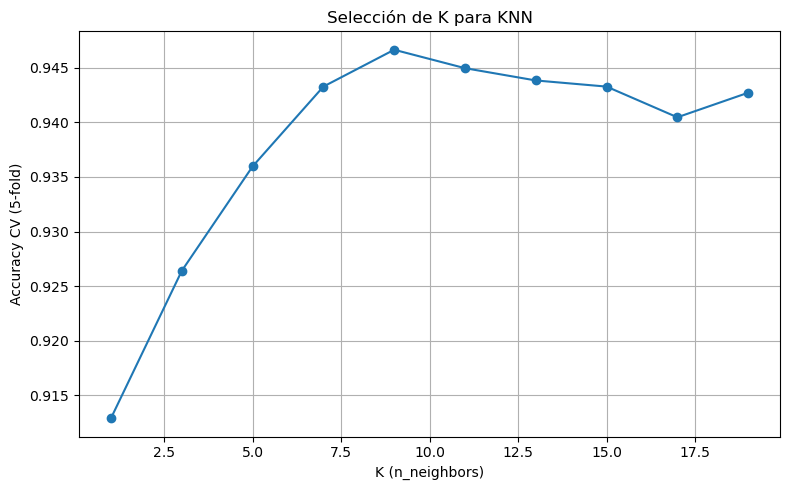

In [175]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy CV (5-fold)')
plt.title('Selección de K para KNN')
plt.grid(True)
plt.tight_layout()
plt.show()

In [176]:
# Mejor K y evaluación en test
best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor K encontrado por CV: {best_k}")

Mejor K encontrado por CV: 9


**(c)** para el valor hallado, calcular la precisión del método (porcentaje de aciertos) en el conjunto de testeo.

In [178]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
test_accuracy = best_knn.score(X_test, y_test)
print(f"Precisión en conjunto de test con K={best_k}: {test_accuracy:.3f}")

Precisión en conjunto de test con K=9: 0.951


**O3**. (Opcional.) **Maldición de la dimensionalidad.** Vimos que al utilizar muchas variables explicativas podemos caer en la maldición de la dimensionalidad. Una estrategia posible para evitar esto es usar las componentes principales para clasificación. ¿Cuántas componentes tenemos que tomar si queremos que esas componentes expliquen al menos un 10 % de la varianza total? Definir un DataFrame *Z* que contenga esas componentes y repetir el ejercicio anterior. ¿Mejoró la precisión del método?

In [180]:
# Ajustamos un PCA sin reducción para calcular la varianza explicada
pca_full = PCA()
Z_full = pca_full.fit_transform(X.toarray())  # convierte sparse a denso si es necesario

In [181]:
# Ver explained variance ratio de cada componente
evr = pca_full.explained_variance_ratio_
# Contamos cuántas componentes explican al menos un 10% de la varianza
mask = evr >= 0.10
n_comps = mask.sum()
print(f"Número de componentes con ≥10% de varianza: {n_comps}")
print("Explicación por componente (%):")
for idx, ratio in enumerate(evr[mask], start=1):
    print(f"  Componente {idx} → {ratio:.2%}")

Número de componentes con ≥10% de varianza: 0
Explicación por componente (%):


In [193]:
# Definimos PCA reducido con esas n_comps y transformar X
pca_reduced = PCA(n_components=n_comps)
Z = pca_reduced.fit_transform(X.toarray())

In [194]:
# Repetimos la clasificación KNN sobre Z (igual que en el punto 13, pero usando Z en lugar de X)
X_train, X_test, y_train, y_test = train_test_split(
    Z, y, test_size=0.2, random_state=42, stratify=y
)

In [195]:
# Selección de K (impares 1–19) por CV en train
k_values = list(range(1, 20, 2))
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Graficamos para visualizar
plt.figure(figsize=(6,4))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy CV (5-fold)')
plt.title('Selección de K con PCA reducido')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1096, in check_array
    raise ValueError(
ValueError: Found array with 0 feature(s) (shape=(1424, 0)) while a minimum of 1 is required by KNeighborsClassifier.


In [199]:
# Mejor K y evaluación en test
best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor K tras PCA reducido: {best_k}")

ValueError: attempt to get argmax of an empty sequence

In [201]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
acc_reduced = best_knn.score(X_test, y_test)
print(f"Precisión en test con PCA reducido (K={best_k}): {acc_reduced:.3f}")

ValueError: Found array with 0 feature(s) (shape=(1780, 0)) while a minimum of 1 is required by KNeighborsClassifier.

### Clasificación utilizando los títulos de las noticias

**14**. Generar un DataFrame d**f_titles_tfidf** que contenga una columna por cada stem que aparece en los títulos de las noticias. Para cada noticia, cada columna indica el valor de TF-IDF.

In [206]:
# Creamos vectorizador TF–IDF para títulos
vectorizer_titles = TfidfVectorizer(analyzer=tokenize_and_stem,smooth_idf=False)

In [208]:
X_titles = vectorizer_titles.fit_transform(df_news['title'])

df_titles_tfidf = pd.DataFrame(X_titles.toarray(),columns=vectorizer_titles.get_feature_names_out())

df_titles_tfidf

,aaa,aaliyah,abandon,abba,aberdeen,abl,abort,absa,absent,academi,...,yet,york,young,youngster,youssou,youth,yuko,zambia,zealand,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.356179,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


**O4**. (Opcional.) Aplicar KNN como en la sección anterior para clasificación de la categoría utilizando solo los títulos de las noticias. ¿Qué porcentaje de aciertos obtenemos?

In [213]:
# Definimos X y y
X_titles = df_titles_tfidf.values       
y = df_news['category']

# Separamos 80% train / 20% test 
X_tr, X_te, y_tr, y_te = train_test_split(X_titles, y, test_size=0.2, random_state=42, stratify=y)

In [215]:
# Selección de K (impares entre 1 y 19) con CV de 5 folds
k_list = list(range(1, 20, 2))
cv_means = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=5, scoring='accuracy')
    cv_means.append(scores.mean())

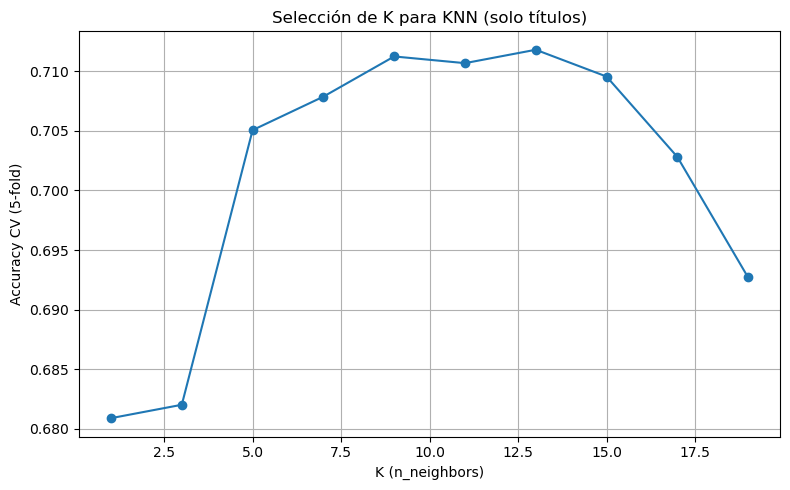

In [217]:
# Gráfico de accuracy vs. K
plt.figure(figsize=(8,5))
plt.plot(k_list, cv_means, marker='o')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy CV (5-fold)')
plt.title('Selección de K para KNN (solo títulos)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [219]:
# Mejor K y evaluación final
best_k = k_list[np.argmax(cv_means)]
print(f"Mejor K encontrado por CV: {best_k}")

Mejor K encontrado por CV: 13


In [221]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_tr, y_tr)
acc_test = knn_final.score(X_te, y_te)
print(f"Precisión en test usando títulos (K={best_k}): {acc_test:.3f}")

Precisión en test usando títulos (K=13): 0.739


**15**. Definir una nueva serie `entretenimiento` que tome valor 1 si la categoría es entretenimiento y 0 si no. Aplicar KNN como en la sección anterior para clasificación de la categoría entrenimiento utilizando solo los títulos de las noticias (es decir, para predecir la variable entretenimiento). ¿Qué porcentaje de aciertos obtenemos?

In [235]:
# Definimos X y la variable binaria y
X = df_titles_tfidf.values
y = (df_news['category'] == 'entertainment').astype(int)
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 2220    0
 2221    0
 2222    0
 2223    0
 2224    0
 Name: category, Length: 2225, dtype: int32)

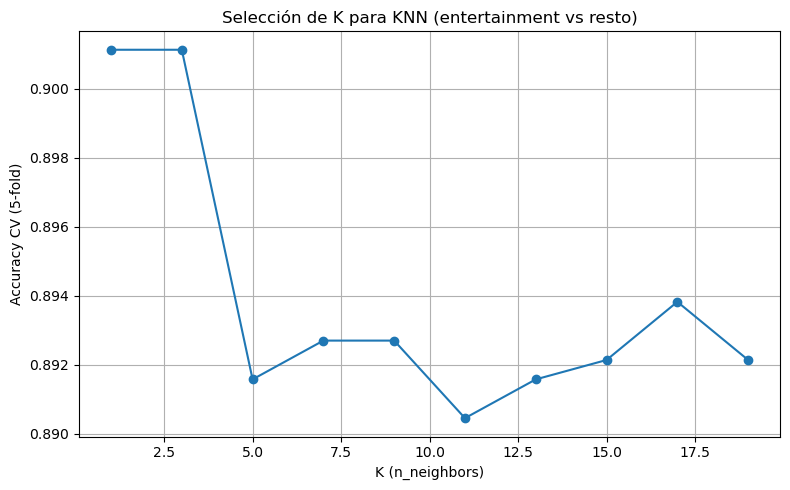

In [228]:
# 3. Separamos 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Selección de K (impares entre 1 y 19) con CV de 5 folds
k_list = list(range(1, 20, 2))
cv_means = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_means.append(scores.mean())

# Gráfico de accuracy CV vs. K
plt.figure(figsize=(8,5))
plt.plot(k_list, cv_means, marker='o')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Accuracy CV (5-fold)')
plt.title("Selección de K para KNN (entertainment vs resto)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [232]:
# Mejor K y evaluación final en test
best_k = k_list[np.argmax(cv_means)]
print(f"Mejor K encontrado por CV: {best_k}")

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
acc_test = knn_final.score(X_test, y_test)
print(f"Precisión en test para 'entertainment' (K={best_k}): {acc_test:.3f}")

Mejor K encontrado por CV: 1
Precisión en test para 'entertainment' (K=1): 0.892


**16**. Proponer otro modelo de clasificación para predecir el valor de esta variable. Puede ser un modelo de regresión lineal, logística, red neuronal o cualquier otro modelo.

In [255]:
# 2. Split 80/20 estratificado
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [262]:
# Creamos y validamos Random Forest con CV (n_estimators=100)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
cv_scores = cross_val_score(rf, X_tr, y_tr, cv=5, scoring='accuracy')
print(f"Accuracy CV (5-fold): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

Accuracy CV (5-fold): 0.902 ± 0.013


In [263]:
# Entrenar en todo el conjunto de train y evaluar en test
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_te)
acc_test = accuracy_score(y_te, y_pred)
print(f"\nPrecisión en test: {acc_test:.3f}\n")


Precisión en test: 0.919



In [266]:
# Reporte de métricas
print("Classification Report:")
print(classification_report(y_te, y_pred, target_names=['no-entertainment','entertainment']))

Classification Report:
                  precision    recall  f1-score   support

no-entertainment       0.92      0.99      0.95       368
   entertainment       0.90      0.60      0.72        77

        accuracy                           0.92       445
       macro avg       0.91      0.79      0.84       445
    weighted avg       0.92      0.92      0.91       445



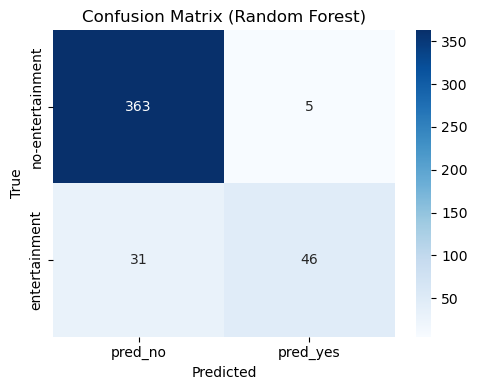

In [260]:

# 6. Matriz de confusión
cm = confusion_matrix(y_te, y_pred)
df_cm = pd.DataFrame(cm, index=['no-entertainment','entertainment'], columns=['pred_no','pred_yes'])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Random Forest)')
plt.tight_layout()
plt.show()

**18**. Utilizando los mismos conjuntos de entrenamiento y testeo de la sección anterior, calcular los parámetros e hiperparámetros del modelo en el conjunto de entrenamiento y calcular el porcentaje de aciertos en el conjunto de testeo. Comparar con KNN. (No se preocupen si no obtienen un porcentaje mayor al de KNN, mientras sigan los pasos correctos para ajustar el modelo.)

In [282]:
# Definios Grid de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [284]:
# GridSearchCV sobre el train
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [285]:
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)
print(f"Mejor accuracy CV (train): {grid.best_score_:.3f}\n")

Mejores hiperparámetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor accuracy CV (train): 0.902



In [286]:
# Evaluar el mejor modelo en test
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
acc_rf_test = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy en test con RF ajustado: {acc_rf_test:.3f}")
print("\nClassification Report (RF):")
print(classification_report(y_test, y_pred_rf, target_names=['no-entertainment','entertainment']))

Accuracy en test con RF ajustado: 0.919

Classification Report (RF):
                  precision    recall  f1-score   support

no-entertainment       0.92      0.99      0.95       368
   entertainment       0.90      0.60      0.72        77

        accuracy                           0.92       445
       macro avg       0.91      0.79      0.84       445
    weighted avg       0.92      0.92      0.91       445



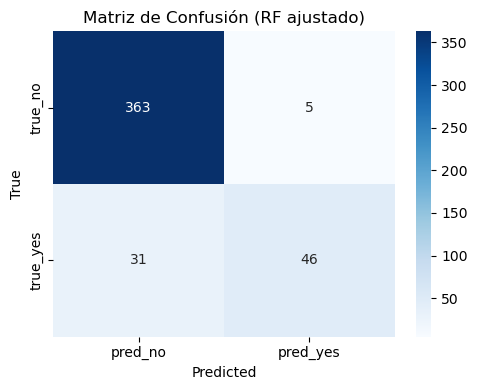

In [287]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(cm, index=['true_no','true_yes'], columns=['pred_no','pred_yes'])
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (RF ajustado)')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [288]:
# Comparación con KNN
print(f"\nComparación de accuracies en test:\n - KNN: {acc_knn_test:.3f}\n - RF ajustado: {acc_rf_test:.3f}")

NameError: name 'acc_knn_test' is not defined